In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import scipy.stats as st

In [ ]:
# 사용자에게 개체 수, generation 수, allele frequency를 입력 받음
num_ind = int(input('Number of individuals: '))
num_gen = int(input('Number of generations: '))
freq_allele = float(input('Frequency of allele A: '))

Number of individuals: 200
Number of generations: 1000
Frequency of allele A: 0.2


In [ ]:
# 입력받은 frequency 대로 첫 번째 generation 생성
alleles = np.array(['A', 'a'])
p = [freq_allele, 1-freq_allele]
gen1 = np.random.choice(alleles, num_ind, p = p)

In [ ]:
# 모든 generation의 정보를 담을 mainlist 생성, 첫 번째 generation의 정보 저장
mainlist = []
mainlist.append(gen1.tolist())

In [ ]:
# binomial sampling probability로 후손 세대를 생성하는 reproduction 함수
def reproduce(gen):
    cnt = collections.Counter(gen)
    freq_A = cnt['A']/num_ind
    new_gen = np.random.choice(alleles, num_ind, p = [freq_A, 1-freq_A])
    return new_gen

In [ ]:
# heterozygosity 계산하는 함수
def get_heterozygosity(gen):
    cnt = collections.Counter(gen)
    freq_A = cnt['A']
    freq_a = cnt['a']
    heterozygosity = 1 - (freq_A**2) - (freq_A**2)
    return heterozygosity

In [ ]:
# n번 시행
n = int(input('Rounds: '))
hlist_all = []
for j in range(n):
    alleles = np.array(['A', 'a'])
    p = [freq_allele, 1-freq_allele]
    gen1 = np.random.choice(alleles, num_ind, p = p)
    original_gen = gen1
    hlist = [get_heterozygosity(gen1)]
    for i in range(num_gen - 1):
        new_gen = reproduce(original_gen)
        mainlist.append(new_gen.tolist())
        hlist.append(get_heterozygosity(new_gen))
        original_gen = new_gen
      hlist_all.append(hlist)

Rounds: 1000


In [ ]:
# 시행값의 평균, 표준편차 구하기
hlist_all_ar = np.array(hlist_all)
hlist_average = np.average(hlist_all_ar, axis = 0)
hlist_std = np.std(hlist_all_ar, axis = 0, ddof = 1) # sample standard deviation: ddof = 1

In [ ]:
# 다음 세대의 expected heterozygosity 1-(1/N)*H0으로 계산하는 함수
def exp_het(ori_het, N):
    return ori_het*(1-(1/N))

In [ ]:
# 다음 세대의 expected heterozygosity 1-(1/N)*H0으로 계산
Htlist=[]
ori_het = hlist_average[0]
Htlist.append(ori_het)
for i in range(num_gen-1):
    new_het = exp_het(ori_het, num_ind)
    Htlist.append(new_het)
    ori_het = new_het

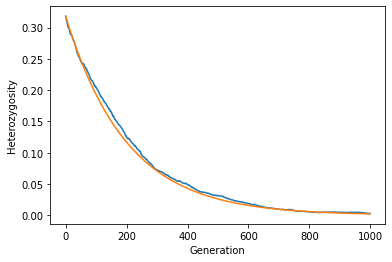

In [ ]:
# 두 그래프 겹쳐서 출력
plt.plot(hlist_average)
plt.plot(Htlist)
plt.xlabel('Generation')
plt.ylabel('Heterozygosity')
plt.show()

In [ ]:
# p-value 계산
Htlist_ar = np.array(Htlist)
tscore = (hlist_average - Htlist_ar)/(hlist_std/(np.sqrt(n)))
p_values = st.t.sf(abs(tscore), df = n-1)*2

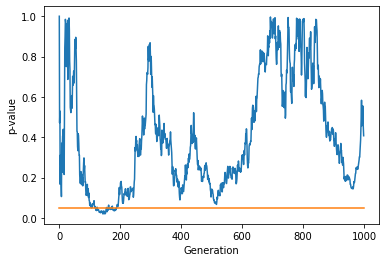

In [ ]:
plt.plot(p_values)
plt.xlabel('Generation')
plt.ylabel('p-value')
reject = np.ones(num_gen)* 0.05
plt.plot(reject)
plt.show()

In [ ]:
k = [x[-1] for x in hlist_all]

In [ ]:
cnt = collections.Counter(k)

In [ ]:
print(cnt)

Counter({0.0: 991, 0.47819095477386936: 1, 0.18889447236180903: 1, 0.457286432160804: 1, 0.0678894472361809: 1, 0.26326633165829144: 1, 0.4373869346733668: 1, 0.48035175879396985: 1, 0.3867336683417085: 1, 0.27015075376884423: 1})
